In [ ]:
#!pip install js2py


In [184]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno

In [104]:


path = '../data/2-8-2022,12:9.csv'
df = pd.read_csv(path)

In [9]:
df.iloc[32]

user_id                                                        600583
id                                                            4564662
uri                 شارع-أحمد-بن-خيرة-حي-الرمال-الرياض-الرياض-4564662
title               شقة للإيجار في شارع أحمد بن خيرة ، حي الرمال ،...
price                                                           24000
content             شقة في السطح شبه جديدة  للايجار  لا يوجد شهري ...
imgs                ['006005837_1658937730570.jpg', '006005836_165...
refresh                                                    1658937873
category                                                            1
beds                                                                2
livings                                                           1.0
wc                                                                  2
area                                                            110.0
type                                                              NaN
street_width        

In [199]:
def toDate(sec):
    try:
        a = datetime.datetime.fromtimestamp(sec)
        a = str(a) 
        a = a.split(" ")
        return a 
    except:
        return sec

'2022-07-25'

In [106]:
# df['create_time'] = df['column name'].replace(['1st old value','2nd old  value',...],['1st new value','2nd new value',...])
i = 0 
while i < len(df['create_time']):
    df['create_time'][i] = toDate(df['create_time'][i])
    i+=1

/tmp/ipykernel_22498/2196997981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['create_time'][i] = toDate(df['create_time'][i])


In [112]:
i = 0 
while i < len(df['refresh']):
    df['refresh'][i] = toDate(df['refresh'][i])
    i+=1

/tmp/ipykernel_22498/1571225724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['refresh'][i] = toDate(df['refresh'][i])


In [110]:
i = 0 
while i < len(df['last_update']):
    df['last_update'][i] = toDate(df['last_update'][i])
    i+=1

/tmp/ipykernel_22498/1382014819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_update'][i] = toDate(df['last_update'][i])


In [211]:
a = df['user'][242]
res = ast.literal_eval(a)
res.get('name')

'مؤسسة نبل العقارية'

In [161]:
df['review'] = 0
df['profileImg'] = 0
df['UserName'] = 0
df['phone'] = 0
df['iam_verified'] = True
df['rega_id'] = 0

In [164]:
i = 0 
while i < len(df['user']):
    a = df['user'][i]
    res = ast.literal_eval(a)
    
    df['review'][i] = res.get('review')
    i+=1

/tmp/ipykernel_22498/3027619202.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'][i] = res.get('review')


In [154]:
df["review"].isna().sum()

398

In [168]:
i = 0 
while i < len(df['user']):
    a = df['user'][i]
    res = ast.literal_eval(a)
    
    df['review'][i] = res.get('review')
    i+=1

In [203]:
i = 0 
while i < len(df['user']):
    a = df['user'][i]
    res = ast.literal_eval(a)
    
    df['profileImg'][i] = res.get('img')
    i+=1

/tmp/ipykernel_22498/2896461739.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profileImg'][i] = res.get('img')


In [212]:
i = 0 
while i < len(df['user']):
    a = df['user'][i]
    res = ast.literal_eval(a)
    
    df['UserName'][i] = res.get('name')
    i+=1

/tmp/ipykernel_22498/1460742994.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UserName'][i] = res.get('name')


In [165]:
i = 0 
while i < len(df['user']):
    a = df['user'][i]
    res = ast.literal_eval(a)
    
    df['iam_verified'][i] = res.get('iam_verified')
    i+=1

/tmp/ipykernel_22498/3738396795.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['iam_verified'][i] = res.get('iam_verified')


In [169]:
i = 0 
while i < len(df['user']):
    a = df['user'][i]
    res = ast.literal_eval(a)
    
    df['phone'][i] = res.get('phone')
    i+=1

/tmp/ipykernel_22498/184754266.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['phone'][i] = res.get('phone')


In [175]:
df.columns

Index(['user_id', 'id', 'uri', 'title', 'price', 'content', 'imgs', 'refresh',
       'category', 'beds', 'livings', 'wc', 'area', 'type', 'street_width',
       'age', 'last_update', 'street_direction', 'ketchen', 'ac', 'furnished',
       'location', 'path', 'user', 'native', 'rent_period', 'city', 'district',
       'width', 'length', 'advertiser_type', 'create_time', '__typename',
       'review', 'profileImg', 'UserName', 'phone', 'iam_verified', 'rega_id'],
      dtype='object')

In [181]:
df['review'].value_counts()

5.00    591
4.44    312
4.37    215
4.26    189
4.35    184
       ... 
3.62      1
3.25      1
3.27      1
3.35      1
3.29      1
Name: review, Length: 158, dtype: int64

In [176]:
df['phone'].value_counts()

0    6823
Name: phone, dtype: int64

<AxesSubplot:>

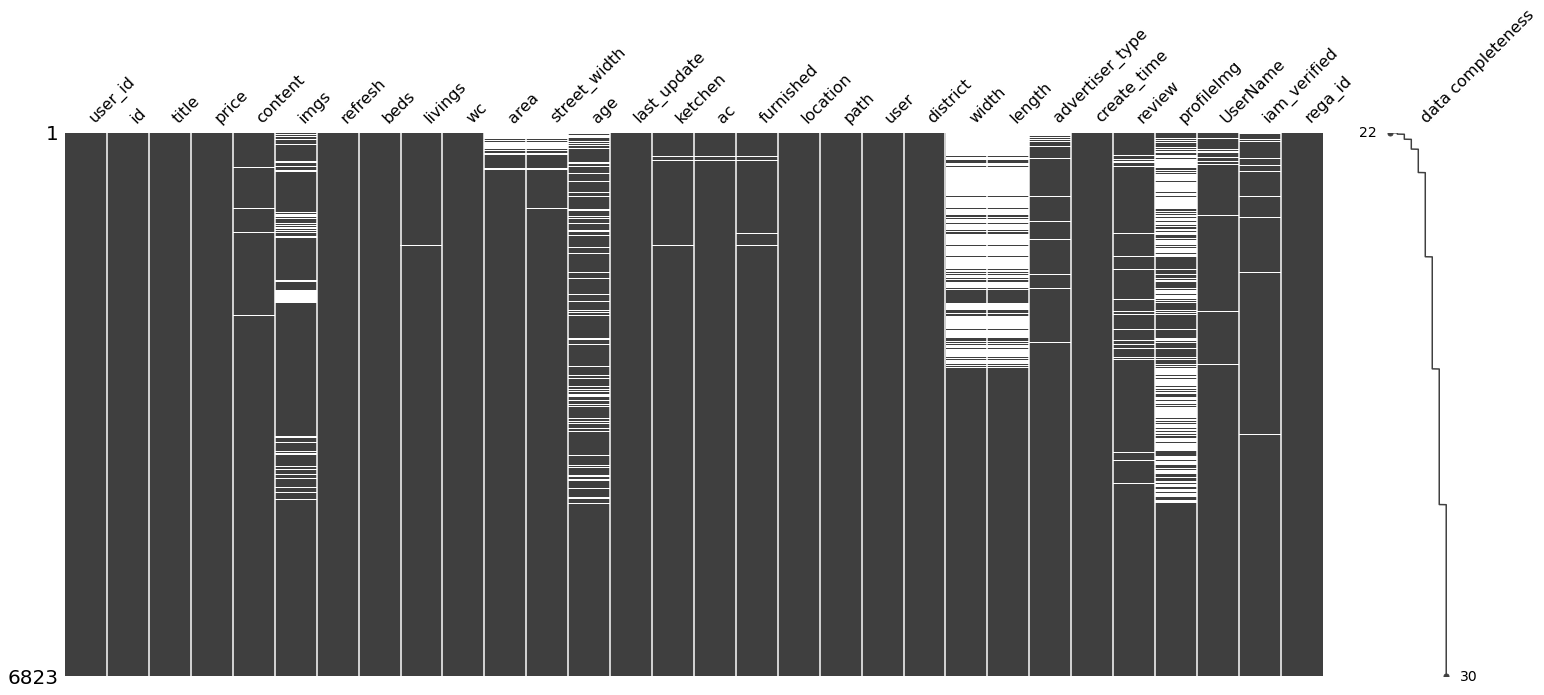

In [213]:
msno.matrix(df, labels=True, filter="bottom", sort="ascending", n=50)

In [206]:
df.shape #number of columns

(6823, 30)

In [214]:
df.iloc[0]

user_id                                                      1992649
id                                                           4517438
title              شقة للإيجار في شارع الحدائق ، حي الملقا ، الري...
price                                                          21000
content            يوجد شقه للايجار بحي الملقا عزاب \nمكونه من \n...
imgs               ['022284157_1658074886266.jpg', '022284152_165...
refresh                                                   2022-08-02
beds                                                               1
livings                                                          0.0
wc                                                                 1
area                                                            60.0
street_width                                                    30.0
age                                                              2.0
last_update                                               2022-08-02
ketchen                           

In [224]:
df['length'].isna().sum()/df['length'].count()

0.49038881607688944

In [ ]:
df.drop('category' , inplace=True , axis =1) # all has same value 
df.drop('street_direction' , inplace=True , axis =1) # lots of na 
df.drop('native' , inplace=True , axis =1) #all are na
df.drop('rent_period' , inplace=True , axis =1) # all elemnets has same value 
df.drop('city' , inplace=True , axis =1) # all elemnets has same value
df.drop('__typename' , inplace=True , axis =1) #all are na
df.drop('phone' , inplace=True , axis =1) # all elemnets has same value
df.drop('type' , inplace=True , axis =1) # lots of na 
df.drop('uri' , inplace=True , axis =1) # this doesn't add anything title+id 
## length and width has lots of na 50% of the values but i am still not sure also there is the area whitch by itself make scense  

In [215]:
df.shape

(6823, 30)

In [225]:
df.to_csv(path)